# Exercises 1: Requests and JSON


In [ ]:
import requests
import pandas as pd

#Mount GDrive in sidebar
PATH = '/content/drive/MyDrive/Colab Notebooks/data/'
url = 'https://python.zgulde.net/api/v1/'

In [ ]:
#how many pages in sales?
data = requests.get(url+'sales').json()
pages = data['payload']['max_page']
pages

183

In [ ]:
def return_df(url, df_name):
  data = requests.get(url + df_name).json()

  if df_name == 'sales':
    pages = data['payload']['max_page']
    df = pd.DataFrame(data['payload'][df_name])

    for p in range(2, pages+1):
      url2 = url + df_name + f'?page={p}'
      data = requests.get(url2).json()
      df = pd.concat([df, pd.DataFrame(data['payload'][df_name])])
  
  else:
    df = pd.DataFrame(data['payload'][df_name])

  return df

In [ ]:
df_items = return_df(url, 'items')
#uncomment below to reload, takes about 5 minutes
#df_sales = return_df(url, 'sales') 
df_stores = return_df(url, 'stores')

In [ ]:
#so id column matches column in sales
df_stores.rename(columns={'store_id':'store'}, inplace=True)
df_items.rename(columns={'item_id':'item'}, inplace=True)
df_sales.rename(columns={'sale_id':'sale'}, inplace=True)

In [ ]:
df = df_sales.merge(df_stores)
df = df.merge(df_items)
df.head()


,item,sale_amount,sale_date,sale,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [ ]:
df.shape

(365200, 14)

In [ ]:
#save to drive (61 MB)
df.to_csv(PATH + 'codeup_sales', index=False)

Open Power Systems Data for Germany includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.

In [ ]:
url =  'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df2 = pd.read_csv(url)
df2.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
#save to drive (200 KB)
df2.to_csv(PATH + 'codeup_power', index=False)

# Exercises 2: Time Series in Pandas

In [295]:
#!pip install vega_datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

sf = data.sf_temps()
sea = data.seattle_weather()
fly = data.flights_20k()

sf = sf.set_index('date')
sea = sea.set_index('date')
fly = fly.set_index('date')

San Francisco

    Resample by the day and take the average temperature. Visualize the average temperature over time.
    Write the code necessary to visualize the minimum temperature over time.
    Write the code necessary to visualize the maximum temperature over time.
    Which month is the coldest, on average?
    Which month has the highest average temperature?
    Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
    Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [230]:
#resample by new datetime index
sf_daily = sf.resample('D').mean()
sf_daily['min'] = sf.resample('D').min()
sf_daily['max'] = sf.resample('D').max()

sf_daily.head()


,temp,min,max
date,,,
2010-01-01,49.170833,45.8,53.3
2010-01-02,49.304167,46.0,53.4
2010-01-03,49.391667,46.1,53.5
2010-01-04,49.445833,46.1,53.6
2010-01-05,49.491667,46.1,53.8


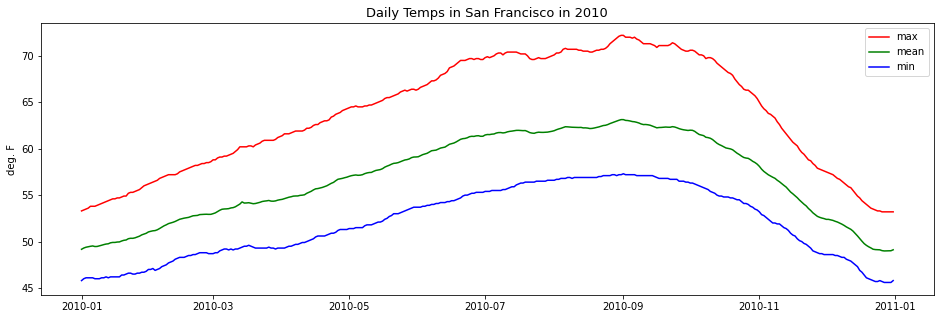

In [223]:
plt.figure(figsize=(16,5))

sns.lineplot(data=sf_daily, x='date', y='max', color='red')
sns.lineplot(data=sf_daily, x='date', y='temp', color='green')
sns.lineplot(data=sf_daily, x='date', y='min', color='blue')

plt.title('Daily Temps in San Francisco in 2010', fontsize=13)
plt.xlabel('')
plt.ylabel('deg. F')
plt.legend(['max','mean','min']);

In [224]:
sf_monthly = sf.resample('M').mean()
sf_monthly['min'] = sf.resample('M').min()
sf_monthly['max'] = sf.resample('M').max()

sf_monthly.index = sf_monthly.index.month_name()
sf_monthly

,temp,min,max
date,,,
January,49.984140,45.8,56.2
February,52.243899,46.9,58.6
March,53.956528,48.7,61.3
April,55.633056,49.3,64.3
May,57.970968,51.4,66.4
June,60.444722,53.7,69.7
July,61.765457,55.4,70.4
August,62.405376,56.6,72.2
September,62.487083,56.4,72.2


In [225]:
hottest_month = sf_monthly.iloc[np.argmax(sf_monthly.temp)].name
coldest_month = sf_monthly.iloc[np.argmin(sf_monthly.temp)].name

f'{hottest_month} is hottest. {coldest_month} is coldest'

'September is hottest. January is coldest'

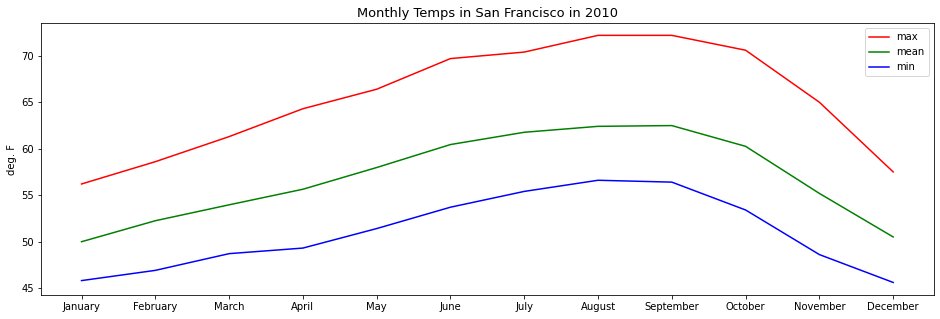

In [226]:
plt.figure(figsize=(16,5))

sns.lineplot(data=sf_monthly, x='date', y='max', color='red')
sns.lineplot(data=sf_monthly, x='date', y='temp', color='green')
sns.lineplot(data=sf_monthly, x='date', y='min', color='blue')

plt.title('Monthly Temps in San Francisco in 2010', fontsize=13)
plt.xlabel('')
plt.ylabel('deg. F')
plt.legend(['max','mean','min']);

Seattle

    Which year and month combination has the highest amount of precipitation?
    Visualize the amount of monthly precipitation over time.
    Visualize the amount of wind over time. Choose a time interval you think is appropriate.
    Which year-month combination is the windiest?
    What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
    In which month does it rain the most?
    Which month has the most number of days with a non-zero amount of precipitation?



In [253]:
sea.groupby('weather').count()

,precipitation,temp_max,temp_min,wind
weather,,,,
drizzle,54,54,54,54
fog,411,411,411,411
rain,259,259,259,259
snow,23,23,23,23
sun,714,714,714,714


In [247]:
sea_monthly = sea.resample('M').mean()
sea_monthly.index = sea_monthly.index.strftime('%Y-%m')
sea_monthly.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01,5.590323,7.054839,1.541935,3.900000
2012-02,3.182759,9.275862,3.203448,3.903448
2012-03,5.903226,9.554839,2.838710,4.248387
2012-04,2.270000,14.873333,5.993333,3.373333
2012-05,1.683871,17.661290,8.190323,3.354839


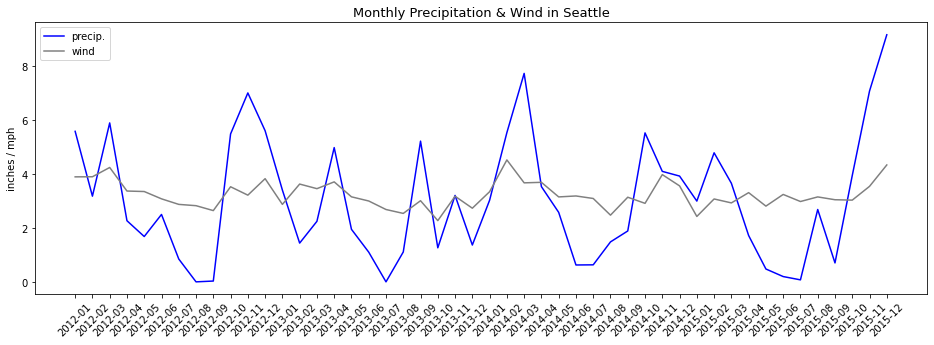

In [264]:
plt.figure(figsize=(16,5))

sns.lineplot(data=sea_monthly, x='date', y='precipitation', color='blue')
sns.lineplot(data=sea_monthly, x='date', y='wind', color='gray')

plt.title('Monthly Precipitation & Wind in Seattle', fontsize=13)
plt.xlabel('')
plt.ylabel('inches / mph')
plt.xticks(rotation=45)
plt.legend(['precip.','wind']);

In [255]:
most_precipitation = sea_monthly.iloc[np.argmax(sea_monthly.precipitation)].name
most_wind = sea_monthly.iloc[np.argmax(sea_monthly.wind)].name

f'{most_precipitation} is rainiest/snowiest and {most_wind} is windiest'


'2015-12 is rainiest/snowiest and 2014-02 is windiest'

Flights

    Convert any negative delays to 0.
    Which hour of the day has the highest average delay?
    Does the day of the week make a difference in the delay amount?
    Does the month make a difference in the delay amount?



In [296]:
delays = []
for x in fly.delay:
  delays.append(max(x, 0))
  
fly['delay'] = delays

In [297]:
fly.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [315]:
fly_hourly = fly.groupby(fly.index.hour).mean()
longest_wait = fly_hourly.iloc[np.argmax(fly_hourly.delay)].name

f' Hour {longest_wait} of 24 has the longest avg. wait.'

' Hour 3 of 24 has the longest avg. wait.'

Monday (date 1) has the shortest avg. delay.

Friday (date 5) has the longest avg. delay.

In [321]:
fly_by_day = fly.groupby(fly.index.strftime('%w')).mean()
fly_by_day

,delay,distance
date,,
0,10.413542,507.987758
1,7.165772,505.032215
2,9.410866,496.021732
3,11.032478,501.009094
4,12.821322,485.175025
5,17.757596,501.118230
6,8.431498,550.889031


February has the longest delays.

March has the shortest delays.

In [324]:
fly_by_month = fly.groupby(fly.index.month_name()).mean()
fly_by_month

,delay,distance
date,,
February,12.306106,511.156170
January,11.301592,500.391952
March,9.875287,504.712069


# Exercises 3: ?